In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

First create a dictionary with all known IDs

In [2]:
matchdict = {}
with open("IDsnofrag.txt") as ifh:
    for idx in (_.strip() for _ in ifh.readlines()):
        matchdict[idx] = [0] * 11

In [3]:
len(matchdict)

57473

Load in each series of matches in turn (skipping any line that isn't in the dictionary)

In [4]:
for helix in range(11):
    failcount = 0
    helixidx = helix+1
    with open(f"IDs{helixidx}.txt") as ifh:
        for idx in (_.strip() for _ in ifh.readlines()):
            try:
                matchdict[idx][helix] += 1
            except KeyError:
                # Catching count of failed additions to dictionary
                failcount +=1
        print(f"{helixidx=} {failcount=}")

helixidx=1 failcount=0
helixidx=2 failcount=0
helixidx=3 failcount=0
helixidx=4 failcount=0
helixidx=5 failcount=0
helixidx=6 failcount=0
helixidx=7 failcount=0
helixidx=8 failcount=0
helixidx=9 failcount=0
helixidx=10 failcount=0
helixidx=11 failcount=0


In [5]:
list(matchdict.items())[:10]

[('split3', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 ('A0A3M6V931', [3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2]),
 ('A0A3R7Y3I5', [3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2]),
 ('A0A0G4MCH1', [2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2]),
 ('A0A1I8FXG0', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 ('A0A1I8HTF6', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 ('A0A3M6UJ14', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 ('A0A336MBT3', [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 ('A0A1Y1Y6N9', [2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0]),
 ('A0A1I8GPP1', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [6]:
dfm = pd.DataFrame.from_dict(matchdict, orient="index")

In [7]:
dfm

,0,1,2,3,4,5,6,7,8,9,10
split3,1,1,1,1,1,1,1,1,1,1,1
A0A3M6V931,3,0,0,0,0,3,0,0,0,3,2
A0A3R7Y3I5,3,0,0,0,0,3,0,0,0,3,2
A0A0G4MCH1,2,2,0,2,0,2,0,0,2,0,2
A0A1I8FXG0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
W9QQC1,0,0,0,0,0,0,0,0,0,0,0
A0A6A6UTM1,0,0,0,0,0,0,0,0,0,0,0
A0A438JQI9,0,0,0,0,0,0,0,0,0,0,0
A0A109LCE4,0,0,0,0,0,0,0,0,0,0,0


In [8]:
arr = np.array(list(matchdict.values()))

In [9]:
type(arr)

numpy.ndarray

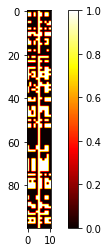

In [10]:
plt.imshow(arr[500:600,:], cmap='hot')
plt.colorbar()
plt.show()

In [11]:
# True if first and second column are equal to 1
all_hit = np.all(arr == 1, axis=1)
all_hit

array([ True, False, False, ..., False, False, False])

In [12]:
# Total count of matches with 1 in first and second position
sum(all_hit)

935

In [13]:
# Which rows have matches in first and second position?
np.where(all_hit)

(array([    0,  1300,  1561,  1584,  1737,  1820,  1821,  1822,  1823,
         1824,  1825,  1826,  1830,  1831,  1832,  1833,  1834,  1835,
         1838,  1843,  1844,  1864,  1865,  1866,  1867,  1868,  1876,
         1913,  1923,  1924,  1927,  1935,  1945,  1955,  1965,  1967,
         1968,  1969,  1970,  1971,  1972,  1973,  1976,  1977,  1978,
         1980,  1981,  1982,  1996,  1997,  1999,  2000,  2001,  2004,
         2007,  2008,  2014,  2015,  2016,  2017,  2018,  2019,  2020,
         2021,  2022,  2023,  2024,  2025,  2026,  2027,  2028,  2029,
         2030,  2031,  2032,  2033,  2034,  2035,  2036,  2037,  2038,
         2039,  2040,  2041,  2042,  2043,  2044,  2045,  2046,  2047,
         2048,  2049,  2050,  2051,  2052,  2053,  2054,  2055,  2056,
         2057,  2058,  2059,  2060,  2061,  2062,  2063,  2064,  2065,
         2066,  2067,  2068,  2069,  2070,  2071,  2072,  2073,  2074,
         2075,  2076,  2077,  2078,  2079,  2080,  2081,  2082,  2083,
      

In [14]:
# Which sequences do these correspond to?
matcharr = np.array(list(matchdict.keys()))
matcharr[all_hit]

array(['split3', 'A0A3B0VBX0', 'A0A7H9LQE1', 'A0A7Z8E0C9', 'A0A7L5V1U3',
       'A0A0G9FTQ5', 'A0A0H2V4V5', 'A0A0H3EFX5', 'A0A7D6UU82',
       'A0A7U9FWD7', 'S1Q791', 'V0USB2', 'A0A0E2L910', 'A0A0H2YWR5',
       'A0A1X3K8A5', 'A0A2G8ZSQ8', 'B7MDB0', 'Q1RF84', 'A0A454A1W4',
       'A0A029IB89', 'A0A376DD79', 'A0A6D0IPB6', 'A0A4V1GRD5',
       'A0A4Z0I205', 'A0A5F1GAR9', 'A0A659KB79', 'A0A403LZ88',
       'A0A2X7MWY2', 'A0A376HV85', 'B7UJS4', 'A0A774N2U7', 'A0A5B9AVA9',
       'A0A7L7E9T8', 'A0A7D7DEA0', 'A0A6D0H9H5', 'A0A061YLH2',
       'A0A192CI04', 'F4SUS0', 'W8ZN64', 'A0A0J2B7N6', 'A0A7U9GAS8',
       'L3QER2', 'A0A0K4NK65', 'A0A1X3JT93', 'B1EKN5', 'A0A765T1T4',
       'A0A7U8WWI8', 'W0ARE9', 'A0A3S6ZAQ7', 'F0JMA7', 'A0A0K9TBR6',
       'A0A2Y0X1Z3', 'F4UZ46', 'A0A777XP81', 'A0A2X7JEZ7', 'L4JGS8',
       'A0A377EDZ7', 'A0A080JA88', 'A0A0E0Y4F1', 'A0A0E1LU20',
       'A0A0E1SWF0', 'A0A0H3MHY7', 'A0A0H3PRK9', 'A0A0I3I1M3',
       'A0A169QHR2', 'A0A1E2VPT8', 'A0A1S9JIM8', 'A0A1X3ICE5',

In [15]:
# Check result
for idx in matcharr[all_hit][:10]:
    print(f"{idx=} {matchdict[idx]}")

idx='split3' [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
idx='A0A3B0VBX0' [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
idx='A0A7H9LQE1' [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
idx='A0A7Z8E0C9' [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
idx='A0A7L5V1U3' [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
idx='A0A0G9FTQ5' [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
idx='A0A0H2V4V5' [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
idx='A0A0H3EFX5' [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
idx='A0A7D6UU82' [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
idx='A0A7U9FWD7' [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [16]:
# Which sequences have single matches to helix 2?
hit_in_2 = arr[:, 1] == 1  # Boolean array
matcharr[hit_in_2]  # All sequences with single match to helix 2
print(f"{len(matcharr[hit_in_2])=}")

len(matcharr[hit_in_2])=16556


In [17]:
# Multiple hits in any column?
multi_hit = np.any(arr > 1, axis=1)
matcharr[multi_hit]

array(['A0A3M6V931', 'A0A3R7Y3I5', 'A0A0G4MCH1', 'A0A1Y1Y6N9',
       'A0A553N736', 'A0A0G4KE81', 'A0A6A1VES8', 'A0A1Q9DW67', 'J9I5T7',
       'A0A2P5WLD7', 'A0A2J8A3F4', 'J9ID18', 'A0A553P3C1', 'A0A3C1CWU4',
       'A0A226MQD7', 'E9HAT0', 'T1II21', 'G5CA94', 'A0A662YXT2', 'L5MB47',
       'A0A183BJZ4', 'A0A183F7D7'], dtype='<U10')

In [18]:
for idx in matcharr[multi_hit]:
    print(f"{idx=} {matchdict[idx]}")

idx='A0A3M6V931' [3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2]
idx='A0A3R7Y3I5' [3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2]
idx='A0A0G4MCH1' [2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2]
idx='A0A1Y1Y6N9' [2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0]
idx='A0A553N736' [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
idx='A0A0G4KE81' [2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1]
idx='A0A6A1VES8' [0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0]
idx='A0A1Q9DW67' [1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0]
idx='J9I5T7' [2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
idx='A0A2P5WLD7' [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
idx='A0A2J8A3F4' [0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0]
idx='J9ID18' [2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
idx='A0A553P3C1' [2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0]
idx='A0A3C1CWU4' [1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0]
idx='A0A226MQD7' [1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1]
idx='E9HAT0' [1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0]
idx='T1II21' [0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1]
idx='G5CA94' [2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
idx='A0A662YXT2' [1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0]
idx='L5MB47' [0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1]
idx=

In [19]:
# Which sequences have single matches to all helices?
hit_in_all = arr[0:, 10] == 1  # Boolean array
matcharr[hit_in_all]  # All sequences with single match to helix 2
print(f"{len(matcharr[hit_in_all])=}")

len(matcharr[hit_in_all])=13039


In [20]:
seqs = matcharr[all_hit]

In [21]:
seqs

array(['split3', 'A0A3B0VBX0', 'A0A7H9LQE1', 'A0A7Z8E0C9', 'A0A7L5V1U3',
       'A0A0G9FTQ5', 'A0A0H2V4V5', 'A0A0H3EFX5', 'A0A7D6UU82',
       'A0A7U9FWD7', 'S1Q791', 'V0USB2', 'A0A0E2L910', 'A0A0H2YWR5',
       'A0A1X3K8A5', 'A0A2G8ZSQ8', 'B7MDB0', 'Q1RF84', 'A0A454A1W4',
       'A0A029IB89', 'A0A376DD79', 'A0A6D0IPB6', 'A0A4V1GRD5',
       'A0A4Z0I205', 'A0A5F1GAR9', 'A0A659KB79', 'A0A403LZ88',
       'A0A2X7MWY2', 'A0A376HV85', 'B7UJS4', 'A0A774N2U7', 'A0A5B9AVA9',
       'A0A7L7E9T8', 'A0A7D7DEA0', 'A0A6D0H9H5', 'A0A061YLH2',
       'A0A192CI04', 'F4SUS0', 'W8ZN64', 'A0A0J2B7N6', 'A0A7U9GAS8',
       'L3QER2', 'A0A0K4NK65', 'A0A1X3JT93', 'B1EKN5', 'A0A765T1T4',
       'A0A7U8WWI8', 'W0ARE9', 'A0A3S6ZAQ7', 'F0JMA7', 'A0A0K9TBR6',
       'A0A2Y0X1Z3', 'F4UZ46', 'A0A777XP81', 'A0A2X7JEZ7', 'L4JGS8',
       'A0A377EDZ7', 'A0A080JA88', 'A0A0E0Y4F1', 'A0A0E1LU20',
       'A0A0E1SWF0', 'A0A0H3MHY7', 'A0A0H3PRK9', 'A0A0I3I1M3',
       'A0A169QHR2', 'A0A1E2VPT8', 'A0A1S9JIM8', 'A0A1X3ICE5',

In [22]:
print(len(seqs))

935


In [23]:
seq = pd.DataFrame(matcharr[all_hit])

In [24]:
seq

,0
0,split3
1,A0A3B0VBX0
2,A0A7H9LQE1
3,A0A7Z8E0C9
4,A0A7L5V1U3
...,...
930,A0A536UQS2
931,A0A7C9PFW2
932,A0A6M4HAE7
933,C4Y3T9


In [25]:
seq = seq.set_index(0)

In [26]:
seq.to_csv('5ref2.txt')

In [27]:
# Which sequences have single matches to helix 6?
hit_in_6 = arr[:, 5] == 1  # Boolean array
matcharr[hit_in_6]  # All sequences with single match to helix 2
print(f"{len(matcharr[hit_in_6])=}")

len(matcharr[hit_in_6])=48123


In [28]:
# Which sequences have single matches to helix 5?
hit_in_5 = arr[:, 4] == 1  # Boolean array
matcharr[hit_in_5]  # All sequences with single match to helix 2
print(f"{len(matcharr[hit_in_5])=}")

len(matcharr[hit_in_5])=12028


In [29]:
# Which sequences have single matches to helix 2?
hit_in_4 = arr[:, 3] == 1  # Boolean array
matcharr[hit_in_4]  # All sequences with single match to helix 2
print(f"{len(matcharr[hit_in_4])=}")

len(matcharr[hit_in_4])=25525


In [30]:
# Which sequences have single matches to helix 1?
hit_in_1 = arr[:, 0] == 1  # Boolean array
matcharr[hit_in_1]  # All sequences with single match to helix 1
print(f"{len(matcharr[hit_in_1])=}")

len(matcharr[hit_in_1])=34353


In [31]:
# Which sequences have single matches to helix 3?
hit_in_3 = arr[:, 2] == 1  # Boolean array
matcharr[hit_in_3]  # All sequences with single match to helix 3
print(f"{len(matcharr[hit_in_3])=}")

len(matcharr[hit_in_3])=16624


In [32]:
# Which sequences have single matches to helix 2?
hit_in_2 = arr[:, 1] == 1  # Boolean array
matcharr[hit_in_2]  # All sequences with single match to helix 2
print(f"{len(matcharr[hit_in_2])=}")

len(matcharr[hit_in_2])=16556


In [33]:
# Which sequences have single matches to helix 2?
hit_in_7 = arr[:, 6] == 1  # Boolean array
matcharr[hit_in_7]  # All sequences with single match to helix 2
print(f"{len(matcharr[hit_in_7])=}")

len(matcharr[hit_in_7])=21734


In [34]:
# Which sequences have single matches to helix 2?
hit_in_8 = arr[:, 7] == 1  # Boolean array
matcharr[hit_in_8]  # All sequences with single match to helix 2
print(f"{len(matcharr[hit_in_8])=}")

len(matcharr[hit_in_8])=8850


In [35]:
# Which sequences have single matches to helix 2?
hit_in_9 = arr[:, 8] == 1  # Boolean array
matcharr[hit_in_9]  # All sequences with single match to helix 2
print(f"{len(matcharr[hit_in_9])=}")

len(matcharr[hit_in_9])=24225


In [36]:
# Which sequences have single matches to helix 2?
hit_in_10 = arr[:, 9] == 1  # Boolean array
matcharr[hit_in_10]  # All sequences with single match to helix 2
print(f"{len(matcharr[hit_in_10])=}")

len(matcharr[hit_in_10])=30646


In [37]:
# Which sequences have single matches to helix 2?
hit_in_11 = arr[:, 10] == 1  # Boolean array
matcharr[hit_in_11]  # All sequences with single match to helix 2
print(f"{len(matcharr[hit_in_11])=}")

len(matcharr[hit_in_11])=13039


In [38]:
for helixnum in range(11):
    print(f"Helix {helixnum}\n{dfm[helixnum].value_counts()}")

Helix 0
1    34353
0    23111
2        7
3        2
Name: 0, dtype: int64
Helix 1
0    40913
1    16556
2        4
Name: 1, dtype: int64
Helix 2
0    40849
1    16624
Name: 2, dtype: int64
Helix 3
0    31946
1    25525
2        2
Name: 3, dtype: int64
Helix 4
0    45441
1    12028
2        4
Name: 4, dtype: int64
Helix 5
1    48123
0     9337
2       11
3        2
Name: 5, dtype: int64
Helix 6
0    35735
1    21734
2        4
Name: 6, dtype: int64
Helix 7
0    48619
1     8850
2        4
Name: 7, dtype: int64
Helix 8
0    33244
1    24225
2        4
Name: 8, dtype: int64
Helix 9
1    30646
0    26820
2        5
3        2
Name: 9, dtype: int64
Helix 10
0    44430
1    13039
2        4
Name: 10, dtype: int64


In [39]:
from collections import Counter, defaultdict

helix_pattern_counts = Counter(["".join((str(_) for _ in pattern)) for pattern in matchdict.values()])

In [40]:
helix_counts = defaultdict(int)
for pattern, count in helix_pattern_counts.items():
    helix_counts[11 - pattern.count("0")] += count
helix_counts

defaultdict(int,
            {11: 935,
             4: 5773,
             6: 5501,
             0: 3594,
             1: 9782,
             2: 5744,
             8: 4364,
             9: 2669,
             3: 5001,
             7: 6237,
             5: 6444,
             10: 1429})

In [41]:
nonzero = dfm != 0
sum(nonzero.iloc[[0]].any())

11

In [42]:
dfm[:5]

,0,1,2,3,4,5,6,7,8,9,10
split3,1,1,1,1,1,1,1,1,1,1,1
A0A3M6V931,3,0,0,0,0,3,0,0,0,3,2
A0A3R7Y3I5,3,0,0,0,0,3,0,0,0,3,2
A0A0G4MCH1,2,2,0,2,0,2,0,0,2,0,2
A0A1I8FXG0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
helix_counts_by_acc = dfm[(dfm != 0)].count(axis=1)
helix_counts_by_acc

split3        11
A0A3M6V931     4
A0A3R7Y3I5     4
A0A0G4MCH1     6
A0A1I8FXG0     0
              ..
W9QQC1         0
A0A6A6UTM1     0
A0A438JQI9     0
A0A109LCE4     0
A0A068UE08     0
Length: 57473, dtype: int64

In [44]:
ten_helices = dfm.loc[list(helix_counts_by_acc[helix_counts_by_acc == 10].index),:]
ten_helices

,0,1,2,3,4,5,6,7,8,9,10
A0A359B5C6,1,1,1,1,0,1,1,1,1,1,1
A0A0F2PDC1,1,1,1,1,0,1,1,1,1,1,1
F2KR79,1,1,1,1,0,1,1,1,1,1,1
A0A075WBP9,1,1,1,1,0,1,1,1,1,1,1
O29285,1,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
K7G3I5,1,0,1,1,1,1,1,1,1,1,1
A0A212CSD5,1,0,1,1,1,1,1,1,1,1,1
A0A452TLL9,1,0,1,1,1,1,1,1,1,1,1
A0A5F5XH32,1,0,1,1,1,1,1,1,1,1,1


In [45]:
ten_helices.to_html("ten_helices.html")